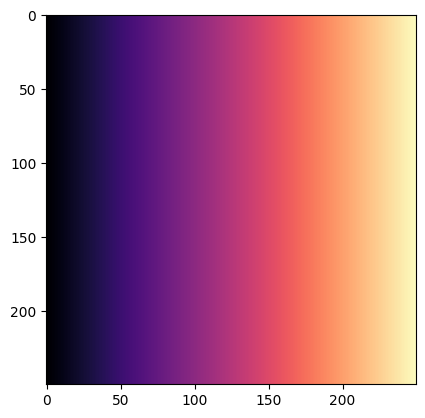

In [7]:
#Упражнение 1
import numpy as np
gradient = np.tile(np.arange(0, 200, dtype='uint8'), (200, 1))
import matplotlib.pyplot as plt
plt.imshow(gradient, cmap="magma", vmin=0, vmax=200)
plt.show()

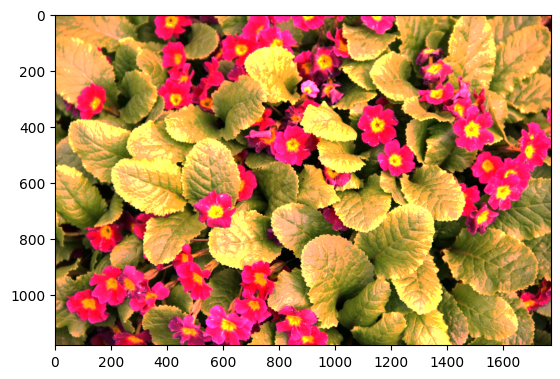

In [8]:
#Упражнение 2
from PIL import Image
img = Image.open('flowers.jpg')
img_arr = np.array(img)
modified = img_arr.astype('float')
modified[:, :, 0] *= 2
modified[modified > 200] = 255
modified = modified.astype('uint8')
plt.imshow(modified)
plt.show()

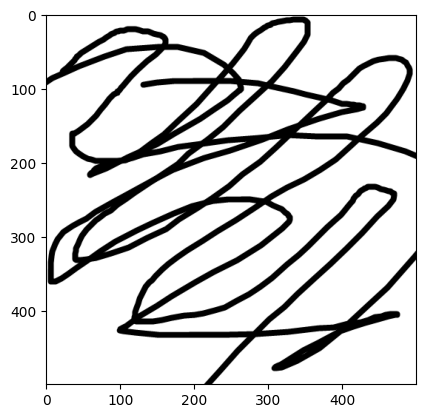

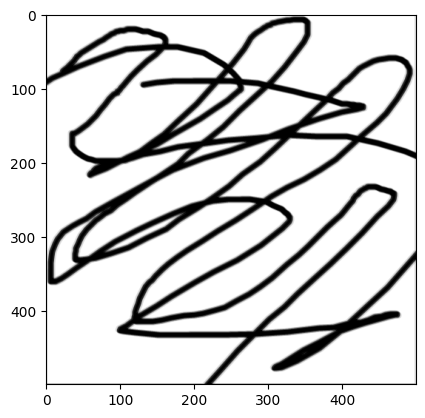

In [2]:
#Упражнение 3 (размывает квадратные, черно-белые фотографии)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
A = Image.open('paint1.png')
A = np.array(A) 
K=np.array([[0, 0, 0, 0, 0], [1/6, 0, 1/6, 0, 0], [0, 0, 1/2, 0, 0], [0, 0, 1/6, 0, 1/6], [0, 0, 0, 0, 0]])
def pad(A, K):
    l=int((K.shape[0]-1)/2)
    o=int((K.shape[1]-1)/2)
    F=np.zeros(((2*l+A.shape[0]),(2*l+A.shape[1])))
    for i in range(l, A.shape[0]+l):
        for k in range(l,A.shape[1]+l):
            F[i,k]=np.average(A[i-l,k-l])
    D=np.zeros((A.shape[0],A.shape[1]))
    for i in range(l,A.shape[0]+l):
        for j in range(l,A.shape[0]+l):
            D[i-l,j-l]=(F[i-l:i+l*l-1,j-l: j+l*l-1]*K-1).sum()
    return(D)
A_ = pad(A,K)

plt.imshow(A, vmin=0, vmax=200)
plt.show()
plt.imshow(A_, cmap=plt.get_cmap('gray'))
plt.show()